**Part 2. AI Agent 활용 프로젝트**

- Chapter 01. 반복하고 수정하는 Agent

    - **📒[실습]** Clip 01. Reflection - 최선의 답변을 위한 반복

## 1. Reflection 개념 이해하기 

`Reflection` : LLM이 선택한 행동의 품질을 평가하기 위해 과거 단계를 관찰하도록 유도하는 과정으로, LLM의 행동에 대해 다시 계획을 새우거나, 평가와 같은 후속 작업에 사용됨

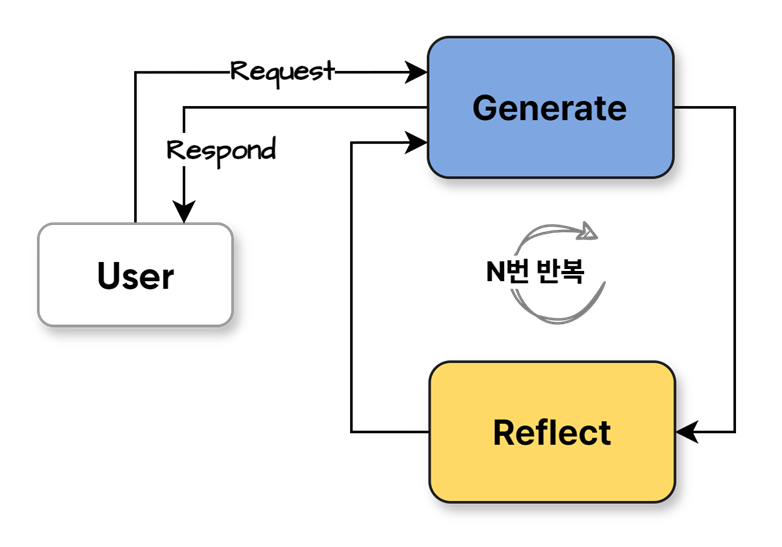

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

### Step 1. Generation LLM

In [2]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 5단락 에세이를 훌륭하게 작성하는 에세이 도우미입니다."
            "사용자의 요청에 따라 최고의 에세이를 작성하세요."
            "사용자가 피드백을 제공할 경우, 이전 시도에서 개선된 수정본을 작성해 응답하세요.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)


llm = ChatOpenAI(model="gpt-4o")

generate = prompt | llm

In [3]:
essay = ""
request = HumanMessage(
    content="AI Agent의 중요성에 대한 에세이를 작성해주세요."
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

제목: 현대 사회에서 AI 에이전트의 중요성

서론:
21세기는 정보 혁명의 시대로, 인공지능(AI)의 발전은 사회 전반에 걸쳐 눈에 띄는 변화를 가져오고 있습니다. 특히 AI 에이전트는 그 중심에 서서 개인의 삶부터 산업 전반에 이르기까지 다양한 분야에서 핵심적인 역할을 수행하고 있습니다. 이 에세이는 AI 에이전트의 중요성을 개인화된 경험 제공, 생산성 향상, 그리고 사회 문제 해결이라는 세 가지 측면에서 살펴보겠습니다.

본론 1: 개인화된 경험 제공
AI 에이전트는 사용자의 필요와 선호도에 맞춘 개인화된 경험을 제공합니다. 예를 들어, 개인비서 앱이나 스마트홈 시스템은 사용자 데이터와 AI 알고리즘을 활용하여 맞춤화된 서비스와 솔루션을 제공합니다. 이를 통해 사용자는 보다 편리하고 효율적인 생활을 누릴 수 있으며, 이러한 개인화된 경험은 일상적인 결정에서부터 복잡한 문제 해결에 이르기까지 다양한 상황에서 가치 있습니다.

본론 2: 생산성 향상
AI 에이전트는 기업 및 조직의 생산성 향상을 돕습니다. 자동화된 프로세스와 데이터 분석을 통해 불필요한 수작업을 줄이고, 더 빠르고 정확한 의사 결정을 지원합니다. 예를 들어, 고객 서비스 분야에서는 AI 챗봇이 기본적인 문의를 처리함으로써 인력을 중요한 일에 집중할 수 있도록 해줍니다. 이러한 생산성 증가는 기업의 경쟁력을 강화하고, 결과적으로 경제 성장을 촉진합니다.

본론 3: 사회 문제 해결
AI 에이전트는 복잡한 사회 문제를 해결하는 데 중요한 도구로 활용될 수 있습니다. 의료 분야에서 AI는 진단 도구로 사용되어 더 빠르고 정확한 진단을 가능하게 하고, 질병 예측 및 예방에 기여하고 있습니다. 또한, 환경 보호 및 자원 관리에서 AI 알고리즘은 최적의 솔루션을 찾아내어 지속 가능한 발전을 지원합니다. 이처럼 AI 에이전트는 인류가 직면한 다양한 도전에 효과적으로 대응할 수 있는 잠재력을 가지고 있습니다.

결론:
AI 에이전트는 개인화된 경험 제공, 생산성 향상, 사회 문제 해결 등 여러 측면에서 우

### Step 2. Reflection LLM

In [4]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 에세이를 채점하는 교사입니다. 사용자가 제출한 에세이에 대한 비평과 개선 사항을 작성하세요."
            "글의 길이, 깊이, 문체 등을 포함해 구체적인 개선 요청을 제공하세요.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
) 
reflect = reflection_prompt | llm

In [5]:
reflection = ""
for chunk in reflect.stream({"messages": [request, HumanMessage(content=essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

제목: 현대 사회에서 AI 에이전트의 중요성

귀하의 에세이는 AI 에이전트가 현대 사회에 미치는 긍정적 영향을 잘 정리하고 있으며, 세 가지 주요 이점을 명확하게 설명하고 있습니다. 각 본론 단락이 유용한 예를 들어 AI의 다양한 적용 가능성을 보여주고 있는 점은 특히 인상적입니다. 다음은 몇 가지 개선 사항입니다.

1. **글의 길이 및 깊이**: 에세이는 비교적 짧은 편입니다. 각 본론에서 제시한 주제를 더 깊이 탐색하십시오. 예를 들어, 개인화된 경험을 다룬 부분에서는 AI의 윤리적 문제나 프라이버시 이슈에 대해서도 간단히 언급하는 것이 좋습니다. 이렇게 하면 보다 균형 잡힌 논의가 가능합니다.

2. **구체적 사례 추가**: 예를 들어, AI가 개인화된 경험 제공에서 어떻게 특정 어플리케이션이나 기기를 통해 사용자 경험을 개선하는지를 구체화하면 독자가 더 쉽게 이해할 수 있습니다. 생산성 향상을 다룬 부분에서는 실제 기업 사례를 몇 가지 제시하는 것도 좋습니다. 이러한 실질적인 예시는 주제를 더욱 설득력 있게 전달할 수 있습니다.

3. **문체 및 표현**: 문체는 전반적으로 명확하고 포멀하지만, 읽는 사람이 조금 더 쉽게 공감할 수 있도록 조금 더 친근한 문체를 사용할 수도 있습니다. 예를 들어, AI가 우리 실생활에 미치는 영향을 설명할 때 개인적인 경험이나 예시를 포함하면 독자가 더 쉽게 공감할 수 있습니다.

4. **결론 강화**: 결론 부분에서 AI의 잠재력을 최대한 활용하기 위한 구체적인 방안이나 제안들을 간단히 언급하면 좋습니다. 예를 들어, AI 기술 발전의 방향 설정, 교육의 중요성, 인프라 투자 등이 그것입니다. 이를 통해 결론이 더 강력하고 실천 가능한 메시지로 마무리됩니다.

전반적으로 잘 작성된 에세이이며, 제안된 개선 사항을 통해 더 풍부하고 설득력 있는 논의로 발전시킬 수 있을 것입니다. AI 에이전트의 중요성에 대한 이해를 더 깊이 있게 전개할 수 있도록 지원하는 내용이 되길 바랍니다.

피드백 내용 반영하여 재 생성

In [6]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

제목: 현대 사회에서 AI 에이전트의 중요성

서론:
21세기는 정보 혁명의 시대로, 인공지능(AI)의 발전은 사회 전반에 걸쳐 눈에 띄는 변화를 가져오고 있습니다. 특히 AI 에이전트는 개인의 삶부터 산업 전반에 이르기까지 다양한 분야에서 핵심적인 역할을 수행하고 있습니다. 이 에세이는 AI 에이전트의 중요성을 개인화된 경험 제공, 생산성 향상, 그리고 사회 문제 해결이라는 세 가지 측면에서 심층적으로 살펴보고자 합니다. 더불어 윤리적 문제나 프라이버시 이슈 등도 간단히 언급함으로써 보다 균형 잡힌 시각을 제공하고자 합니다.

본론 1: 개인화된 경험 제공
AI 에이전트는 사용자 개인의 필요와 선호도에 맞춘 맞춤형 경험을 제공합니다. 예를 들어, 스포티파이와 같은 음악 스트리밍 서비스는 AI 알고리즘을 통해 사용자의 음악 취향을 분석하여 새로운 플레이리스트를 추천합니다. 이러한 개인화된 서비스는 한편으로는 편리함을 제공하지만, 윤리적 문제도 제기됩니다. 데이터 수집 과정에서 발생할 수 있는 프라이버시 침해 문제는 기술의 발전과 함께 반드시 고려되어야 합니다. 사용자의 정보를 올바르게 처리하고 보호하는 방법은 AI 기술이 발전함에 따라 지속적으로 해결해야 할 과제입니다.

본론 2: 생산성 향상
AI 에이전트는 기업 및 조직의 생산성 향상을 돕습니다. 자동화 시스템 및 데이터 분석을 통해 불필요한 수작업을 줄이고, 더 빠르고 정확한 의사 결정을 지원합니다. 예를 들어, 아마존은 AI 기반의 물류 관리 시스템을 통해 창고 운영 효율성을 극대화하고 있습니다. AI는 주문 처리와 재고 관리에서 인간의 오류를 최소화하여, 기업이 고객에게 제공하는 서비스의 질을 높이는데 기여합니다. 이러한 실제 기업 사례들은 AI 에이전트가 얼마나 실질적이고 강력한 도구가 될 수 있는지를 명확히 보여줍니다.

본론 3: 사회 문제 해결
AI 에이전트는 복잡한 사회 문제를 해결하는 데 중요한 도구로 활용될 수 있습니다. 예를 들어, Watson은 인공지능 시스템을 통해 의료 분야에서 다

### Step 3. Graph로 Reflection 구현하기

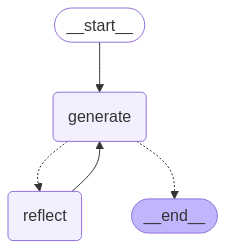

In [7]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver


class State(TypedDict):
    messages: Annotated[list, add_messages]

- Generate 노드

In [8]:
def generation_node(state: State) -> State:
    return {"messages": [generate.invoke(state["messages"])]}

- Reflection 노드

In [9]:
def reflection_node(state: State) -> State:
    cls_map = {"ai": AIMessage, "human": HumanMessage}
    
    # 첫번째 사용자 요청 + 생성메시지 (reflection_node's input)
    # 첫번째 사용자 요청 + 생성메시지 + 피드백메시지 (generation_node's input)
    # 첫번째 사용자 요청 + 생성메시지 + 피드백메시지 + 수정된 생성메시지 (reflection_node's input)
    # 첫번째 사용자 요청 + 생성메시지 + 피드백메시지 + 수정된 생성메시지 + 피드백메시지 (generation_node's input)
    # ...
    translated = [state["messages"][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state["messages"][1:]
    ]
    # translated = [state["messages"][0]] + [
    #     cls_map[msg.type](content=msg.content) for msg in state["messages"][-2:]
    # ]
    res = reflect.invoke(translated) 

    return {"messages": [HumanMessage(content=res.content)]}

In [10]:
graph_builder = StateGraph(State)
graph_builder.add_node("generate", generation_node)
graph_builder.add_node("reflect", reflection_node)
graph_builder.add_edge(START, "generate")

- 반복 횟수 제한

In [11]:
def should_continue(state: State):
    if len(state["messages"]) > 6:
        return END
    return "reflect"


graph_builder.add_conditional_edges("generate", should_continue)

In [12]:
graph_builder.add_edge("reflect", "generate")

In [13]:
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

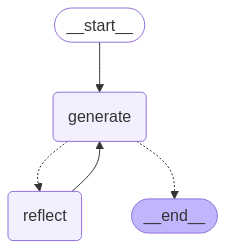

In [ ]:
graph

In [14]:
config = {"configurable": {"thread_id": "1"}}

In [15]:
for event in graph.stream(
    {
        "messages": [
            HumanMessage(
                content="AI Agent의 중요성에 대한 에세이를 작성해주세요."
            )
        ],
    },
    config,
):
    print(event)
    print("---")

{'generate': {'messages': [AIMessage(content='**제목: 현대 사회에서 AI 에이전트의 중요성**\n\n**서론**\n\n21세기의 기술 혁신은 다양한 분야에 걸쳐 빠르게 발전하고 있으며, 그 중 인공지능(AI) 에이전트의 등장은 특히 주목할 만합니다. AI 에이전트는 인간의 의사결정 과정을 지원하고, 효율성을 높이며, 새로운 기회를 창출하는 데 필수적인 도구로 자리잡고 있습니다. 이러한 AI 에이전트는 개인부터 기업, 그리고 국가 단위에 이르기까지 광범위한 영향을 미치며, 그 중요성은 갈수록 커지고 있습니다.\n\n**본론 1: 생산성과 효율성 증대**\n\nAI 에이전트는 다양한 산업 분야에서 생산성과 효율성을 크게 향상시킵니다. 제조업에서는 로봇과 AI 기술로 자동화 공정을 최적화함으로써 불량률을 줄이고, 생산 시간을 단축시킵니다. 서비스업에서도 AI 기반 챗봇은 고객 문의를 실시간으로 응대하여 고객 만족도를 높이는 데 중요한 역할을 하고 있습니다. 이러한 효율성 증대는 비용 절감으로 이어지며, 이는 기업의 경쟁력을 강화합니다.\n\n**본론 2: 개인화된 경험 제공**\n\nAI 에이전트는 소비자에게 개인화된 경험을 제공함으로써 일상 생활을 변화시키고 있습니다. 예를 들어, AI 알고리즘은 사용자의 취향과 행동 패턴을 분석하여 맞춤형 콘텐츠 추천 서비스를 제공합니다. 스마트 홈 기술을 통해 AI는 가전제품을 제어하고, 사용자의 생활 패턴을 학습하여 에너지 효율을 극대화합니다. 이처럼 개인화된 서비스는 사용자 경험을 풍부하게 하고, AI 기술에 대한 의존도를 높이고 있습니다.\n\n**본론 3: 데이터 분석과 의사결정 지원**\n\nAI 에이전트는 방대한 양의 데이터를 분석하여 사람이 놓칠 수 있는 통찰력을 제공합니다. 이는 기업의 전략적 의사결정 과정에서 중요한 역할을 합니다. AI 기반 분석 도구는 시장 변화와 소비자 트렌드를 예측하고, 위험 요소를 사전에 식별함으로써 기업이 취해야 할 최적의 전략을 제시합니다. 더

In [16]:
state = graph.get_state(config)

In [17]:
ChatPromptTemplate.from_messages(state.values["messages"]).pretty_print()

================================ Human Message =================================

AI Agent의 중요성에 대한 에세이를 작성해주세요.

================================== Ai Message ==================================

**제목: 현대 사회에서 AI 에이전트의 중요성**

**서론**

21세기의 기술 혁신은 다양한 분야에 걸쳐 빠르게 발전하고 있으며, 그 중 인공지능(AI) 에이전트의 등장은 특히 주목할 만합니다. AI 에이전트는 인간의 의사결정 과정을 지원하고, 효율성을 높이며, 새로운 기회를 창출하는 데 필수적인 도구로 자리잡고 있습니다. 이러한 AI 에이전트는 개인부터 기업, 그리고 국가 단위에 이르기까지 광범위한 영향을 미치며, 그 중요성은 갈수록 커지고 있습니다.

**본론 1: 생산성과 효율성 증대**

AI 에이전트는 다양한 산업 분야에서 생산성과 효율성을 크게 향상시킵니다. 제조업에서는 로봇과 AI 기술로 자동화 공정을 최적화함으로써 불량률을 줄이고, 생산 시간을 단축시킵니다. 서비스업에서도 AI 기반 챗봇은 고객 문의를 실시간으로 응대하여 고객 만족도를 높이는 데 중요한 역할을 하고 있습니다. 이러한 효율성 증대는 비용 절감으로 이어지며, 이는 기업의 경쟁력을 강화합니다.

**본론 2: 개인화된 경험 제공**

AI 에이전트는 소비자에게 개인화된 경험을 제공함으로써 일상 생활을 변화시키고 있습니다. 예를 들어, AI 알고리즘은 사용자의 취향과 행동 패턴을 분석하여 맞춤형 콘텐츠 추천 서비스를 제공합니다. 스마트 홈 기술을 통해 AI는 가전제품을 제어하고, 사용자의 생활 패턴을 학습하여 에너지 효율을 극대화합니다. 이처럼 개인화된 서비스는 사용자 경험을 풍부하게 하고, AI 기술에 대한 의존도를 높이고 있습니다.

**본론 3: 데이터 분석과 의사결정 지원**

AI 에이전트는 방대한 양의 데이터를 분석하여 사람이

## 2. [Reflexion](https://arxiv.org/abs/2303.11366) 구현하기

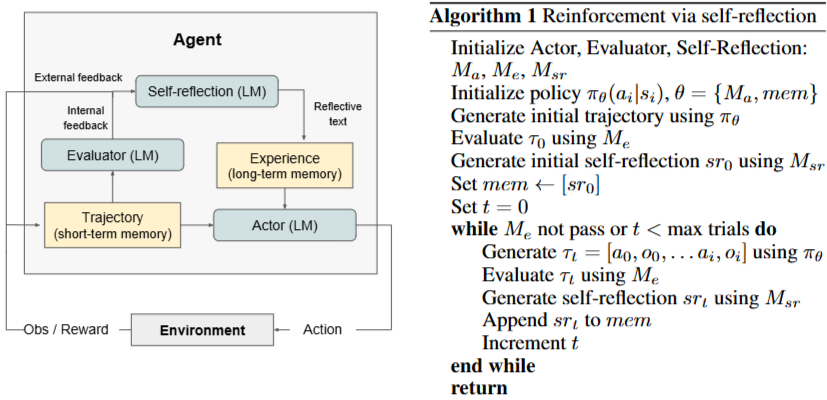

**(1)** 자기반성을 하는 Agent `(Actor (agent) with self-reflection)`

**(2)** 외부 평가자 `External evaluator (task-specific, e.g. code compilation steps)`

**(3)** 자기반성 내용을 기억하는 메모리 `Episodic memory that stores the reflections from (1).`

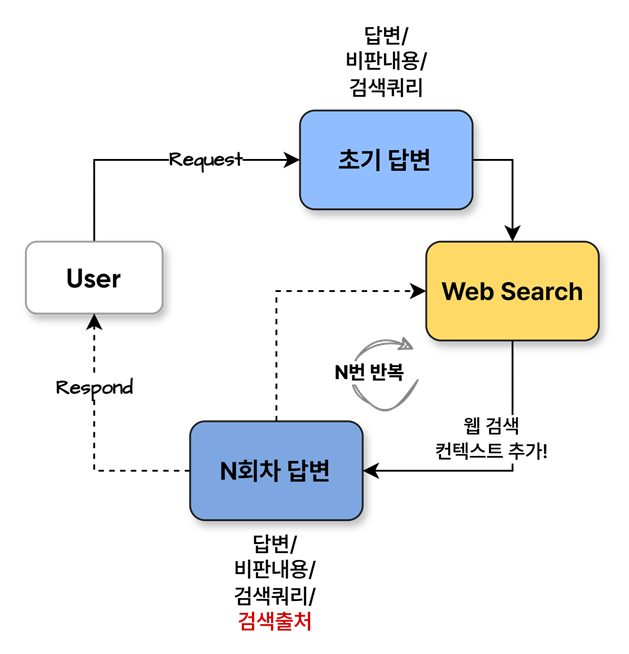

In [18]:
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("TAVILY_API_KEY") # 웹 컨텍스트 추가를 위한 Tavily Search

In [19]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

In [20]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily_tool = TavilySearchResults(max_results=5)

### Step 1. 필요한 데이터 클래스 정의

- `Reflection` - 놓친것 / 불필요한 것

In [21]:
from langchain_core.messages import HumanMessage, ToolMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from pydantic import BaseModel, Field


class Reflection(BaseModel):
    missing: str = Field(description="누락되거나 부족한 부분에 대한 비평")
    superfluous: str = Field(description="불필요한 부분에 대한 비평")

- `AnswerQuestion` - 답변 / 답변에 대한 반성 / 개선하기 위한 검색 쿼리

In [22]:
class AnswerQuestion(BaseModel):
    """Answer the question. Provide an answer, reflection, and then follow up with search queries to improve the answer."""

    answer: str = Field(description="질문에 대한 10문장 이내의 자세한 답변")
    search_queries: list[str] = Field(
        description="현재 답변에 대한 비평을 해결하기 위한 추가 조사를 위한 1~3개의 웹 검색 쿼리"
    )
    reflection: Reflection = Field(description="답변에 대한 자기반성 내용")

- `Responder` - 구조화된 출력을 위한 답변기

In [23]:
class Responder:
    def __init__(self, runnable):
        self.runnable = runnable # Chain

    def respond(self, state: dict):
        response = self.runnable.invoke(
            {"messages": state["messages"]}
        )
        return {"messages": response}

### Step 2. 초기 답변기 만들기 (Initial responder)

- 초기 답변을 위한 Chain 생성 -출력 스키마를 도구로 사용

In [26]:
import datetime

actor_prompt_template = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """당신은 전문 연구자입니다.

            1. {first_instruction}
            2. <Reflect> 생성한 답변을 다시 되돌아보고 개선할 수 있도록 비판하세요.
            3. <Recommend search queries> 답변의 질을 높이기 위해 추가적으로 조사해야 할 정보에 대한 웹 검색 쿼리를 추천하세요.""",
        ),
        MessagesPlaceholder(variable_name="messages"),
        (
            "user",
            "\n\n<Reflect> 사용자 원래 질문과 지금까지의 행동을 되돌아보세요."
        ),
    ]
)

initial_answer_chain = actor_prompt_template.partial(
    first_instruction="질문에 대한 10문장 이내의 자세한 답변을 제공해주세요.", # 초기 답변
) | llm.bind_tools(tools=[AnswerQuestion], tool_choice="any")

- [구조화 출력을 위해 스키마를 도구로 사용하는 방법](https://python.langchain.com/docs/concepts/structured_outputs/#using-tool-calling) 

In [24]:
llm_with_tool = llm.bind_tools(tools=[AnswerQuestion], tool_choice="any")
response = llm_with_tool.invoke([HumanMessage(content="AI Agent가 무엇인가요?")])
print(response)

content='' additional_kwargs={'tool_calls': [{'id': 'call_LmnKZXJETA3rVRdPp3NfIGMH', 'function': {'arguments': '{"answer":"AI 에이전트는 특정 작업을 수행하기 위해 인공지능 기술을 활용하는 소프트웨어 프로그램입니다. 이러한 에이전트는 자율적으로 결정을 내리고 학습하며, 사용자와 상호작용을 통해 다양한 문제를 해결할 수 있습니다. AI 에이전트의 예로는 가상 비서, 챗봇, 추천 시스템 등이 있습니다. 이들은 사용자로부터 입력된 데이터를 분석하고 이를 바탕으로 적절한 응답이나 솔루션을 제공합니다. AI 에이전트는 머신러닝, 자연어 처리, 컴퓨터 비전 등 다양한 AI 기술을 결합하여 구현될 수 있으며, 이는 특정 도메인에 최적화되어 특정한 목표를 달성하는 데 도움을 줍니다. 예를 들어, 고객 서비스 챗봇은 사용자의 문의를 이해하고 적절한 답변을 제공하여 서비스 효율성을 높일 수 있습니다.","search_queries":["AI 에이전트란?","AI 에이전트의 역할 및 특징","AI 기술을 활용한 에이전트의 종류"],"reflection":{"missing":"AI 에이전트의 활용 사례를 구체적으로 제시하지 않았고, 다양한 산업 분야에서의 응용에 대한 설명이 부족했습니다.","superfluous":"기본적인 설명에 집중했고, 너무 기술적이지 않은 설명이 많이 포함되어 일반적인 독자들에게 충분히 이해될 수 있는 내용이었습니다."}}', 'name': 'AnswerQuestion'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 319, 'prompt_tokens': 150, 'total_tokens': 469, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens

In [25]:
response.tool_calls[0]['args']

{'answer': 'AI 에이전트는 특정 작업을 수행하기 위해 인공지능 기술을 활용하는 소프트웨어 프로그램입니다. 이러한 에이전트는 자율적으로 결정을 내리고 학습하며, 사용자와 상호작용을 통해 다양한 문제를 해결할 수 있습니다. AI 에이전트의 예로는 가상 비서, 챗봇, 추천 시스템 등이 있습니다. 이들은 사용자로부터 입력된 데이터를 분석하고 이를 바탕으로 적절한 응답이나 솔루션을 제공합니다. AI 에이전트는 머신러닝, 자연어 처리, 컴퓨터 비전 등 다양한 AI 기술을 결합하여 구현될 수 있으며, 이는 특정 도메인에 최적화되어 특정한 목표를 달성하는 데 도움을 줍니다. 예를 들어, 고객 서비스 챗봇은 사용자의 문의를 이해하고 적절한 답변을 제공하여 서비스 효율성을 높일 수 있습니다.',
 'search_queries': ['AI 에이전트란?', 'AI 에이전트의 역할 및 특징', 'AI 기술을 활용한 에이전트의 종류'],
 'reflection': {'missing': 'AI 에이전트의 활용 사례를 구체적으로 제시하지 않았고, 다양한 산업 분야에서의 응용에 대한 설명이 부족했습니다.',
  'superfluous': '기본적인 설명에 집중했고, 너무 기술적이지 않은 설명이 많이 포함되어 일반적인 독자들에게 충분히 이해될 수 있는 내용이었습니다.'}}

In [27]:
first_responder = Responder(runnable=initial_answer_chain)

In [28]:
example_question = "AI Agent가 무엇인가요?"
initial = first_responder.respond(
    {"messages": [HumanMessage(content=example_question)]}
)

In [29]:
initial

{'messages': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lTWdNnVucHINSG8Bd3gJXiBB', 'function': {'arguments': '{"answer":"AI 에이전트는 인공지능 기술을 사용하여 특정 작업이나 문제를 해결하는 소프트웨어 프로그램입니다. 이러한 에이전트는 자동화된 방식으로 데이터를 분석하고 의사 결정을 내리며, 사용자나 다른 프로그램과 상호작용할 수 있습니다. AI 에이전트는 다양한 형태로 존재할 수 있으며, 이를 통해 고객 서비스, 데이터 처리, 개인 비서 역할 등 여러 작업을 수행합니다. AI 에이전트는 종종 머신러닝 알고리즘을 통해 학습하고 발전하며, 특정 사용자 요구나 환경에 맞춰 점점 더 최적화됩니다. 예를 들어, 가상 비서인 Siri나 Alexa는 AI 에이전트의 한 예로, 음성 명령을 이해하고 수행합니다. 기업에서는 고객 지원 봇이나 데이터 분석 도구로 AI 에이전트를 사용하여 효율성을 높이고 비용을 절감합니다.","search_queries":["AI agent what is it","how AI agents work","uses of AI agents"],"reflection":{"missing":"The explanation could include more technical details about how AI agents function, such as the algorithms used or the architecture of these systems. Additionally, examples of different types of AI agents and their specific applications could provide a clearer picture.","superfluous":"The answer is mostly clear and concise, but the mention of specific pr

- tool 호출 결과 확인 (`AnswerQuestion` 에 맞춰 출력 생성)

In [30]:
initial["messages"].tool_calls[0]["args"]

{'answer': 'AI 에이전트는 인공지능 기술을 사용하여 특정 작업이나 문제를 해결하는 소프트웨어 프로그램입니다. 이러한 에이전트는 자동화된 방식으로 데이터를 분석하고 의사 결정을 내리며, 사용자나 다른 프로그램과 상호작용할 수 있습니다. AI 에이전트는 다양한 형태로 존재할 수 있으며, 이를 통해 고객 서비스, 데이터 처리, 개인 비서 역할 등 여러 작업을 수행합니다. AI 에이전트는 종종 머신러닝 알고리즘을 통해 학습하고 발전하며, 특정 사용자 요구나 환경에 맞춰 점점 더 최적화됩니다. 예를 들어, 가상 비서인 Siri나 Alexa는 AI 에이전트의 한 예로, 음성 명령을 이해하고 수행합니다. 기업에서는 고객 지원 봇이나 데이터 분석 도구로 AI 에이전트를 사용하여 효율성을 높이고 비용을 절감합니다.',
 'search_queries': ['AI agent what is it',
  'how AI agents work',
  'uses of AI agents'],
 'reflection': {'missing': 'The explanation could include more technical details about how AI agents function, such as the algorithms used or the architecture of these systems. Additionally, examples of different types of AI agents and their specific applications could provide a clearer picture.',
  'superfluous': 'The answer is mostly clear and concise, but the mention of specific products like Siri or Alexa might not be necessary unless they are being explored in detail for their architecture and s

### Step 3. 수정 단계(Revision)

In [31]:
class ReviseAnswer(AnswerQuestion):
    """Revise your original answer to your question. Provide an answer, reflection,

    cite your reflection with references, and finally
    add search queries to improve the answer."""

    references: list[str] = Field(
        description="업데이트된 답변에 사용된 인용 출처"
    )

In [32]:
revise_instructions = """이전 답변을 새로운 정보를 바탕으로 수정하세요.
- 이전 비평 내용을 활용해 중요한 정보를 추가해야 합니다.  
  - 수정된 답변에는 반드시 숫자로 된 인용 표시를 포함하여 검증 가능하도록 해야 합니다.  
  - 답변 하단에 "참고문헌" 섹션을 추가하세요 (이 부분은 단어 수 제한에 포함되지 않습니다). 형식은 다음과 같습니다:  
    - [1] https://example.com  
    - [2] https://example.com  

- 이전 비평 내용을 바탕으로 불필요한 정보를 제거하고, 최종 답변은 반드시 200자를 넘지 않도록 하세요.
"""


revision_chain = actor_prompt_template.partial(
    first_instruction=revise_instructions,
) | llm.bind_tools(tools=[ReviseAnswer], tool_choice="any")


revisor = Responder(runnable=revision_chain)

- 초기답변에서 생성한 웹검색 쿼리를 Tool 실행한 결과를 함께 입력

In [33]:
import json

revised = revisor.respond(
    {
        "messages": [
            HumanMessage(content=example_question),
            initial["messages"],
            ToolMessage(
                tool_call_id=initial['messages'].additional_kwargs['tool_calls'][0]['id'],
                content=json.dumps(
                    tavily_tool.invoke(
                        {
                            "query": initial["messages"].tool_calls[0]["args"]['search_queries'][0]
                        }
                    )
                ),
            ),
        ]
    }
)

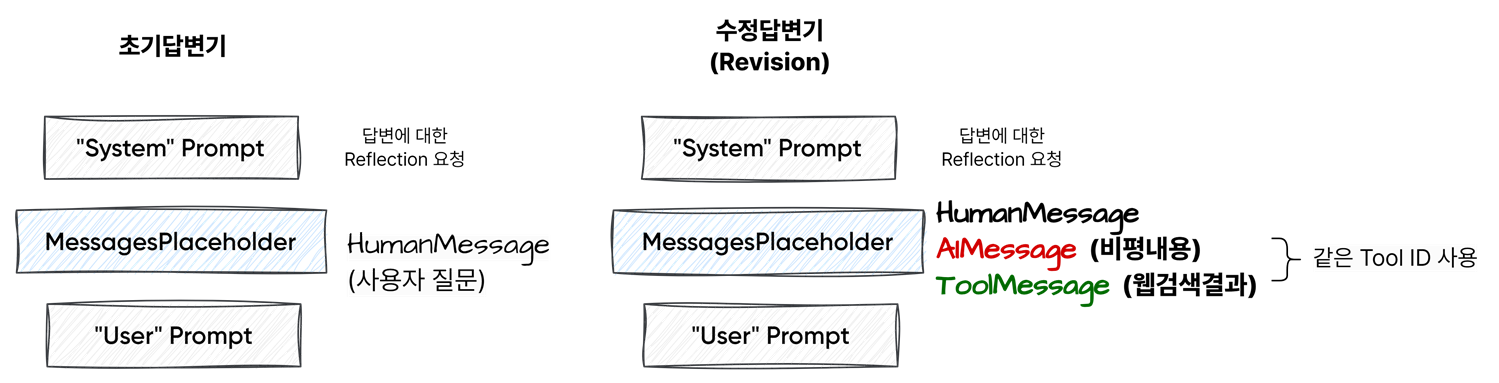

In [34]:
revised["messages"]

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_clQwp9G0OJsLfCg3cfHyMTuc', 'function': {'arguments': '{"answer": "AI 에이전트는 인공지능 기술을 사용하여 자율적으로 작업을 수행하는 소프트웨어입니다. 이들은 환경으로부터 정보를 수집하고, 의사 결정을 하며, 주어진 목표를 달성하기 위해 행동합니다. 예를 들어, 고객 지원에서 AI 에이전트는 사용자의 질문에 자동으로 응답하고 문제를 해결할 수 있습니다. 이러한 에이전트는 딥러닝과 자연어 처리 기술을 활용하여 사용자의 행동을 분석하고 학습하며, 점점 더 정교해집니다 [1][2].", "search_queries": ["AI Agent technical details", "AI Agent algorithms", "AI Agent applications"], "reflection": {"missing": "More examples of AI agents and their specific applications could provide a better understanding. Additionally, technical details about the algorithms that AI agents use would be beneficial.", "superfluous": "Specific examples like Siri and Alexa were previously mentioned but aren\'t necessary unless explored in detail."}, "references": ["[1] https://zapier.com/blog/ai-agent/", "[2] https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-an-ai-agent"]}', 'name': 'ReviseAnswer'}, 'type':

In [35]:
revised["messages"].tool_calls

[{'name': 'ReviseAnswer',
  'args': {'answer': 'AI 에이전트는 인공지능 기술을 사용하여 자율적으로 작업을 수행하는 소프트웨어입니다. 이들은 환경으로부터 정보를 수집하고, 의사 결정을 하며, 주어진 목표를 달성하기 위해 행동합니다. 예를 들어, 고객 지원에서 AI 에이전트는 사용자의 질문에 자동으로 응답하고 문제를 해결할 수 있습니다. 이러한 에이전트는 딥러닝과 자연어 처리 기술을 활용하여 사용자의 행동을 분석하고 학습하며, 점점 더 정교해집니다 [1][2].',
   'search_queries': ['AI Agent technical details',
    'AI Agent algorithms',
    'AI Agent applications'],
   'reflection': {'missing': 'More examples of AI agents and their specific applications could provide a better understanding. Additionally, technical details about the algorithms that AI agents use would be beneficial.',
    'superfluous': "Specific examples like Siri and Alexa were previously mentioned but aren't necessary unless explored in detail."},
   'references': ['[1] https://zapier.com/blog/ai-agent/',
    '[2] https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-an-ai-agent']},
  'id': 'call_clQwp9G0OJsLfCg3cfHyMTuc',
  'type': 'tool_call'}]

### Step 4. 웹검색을 위한 툴 노드 생성

In [36]:
tavily_tool.batch(
    [
        {"query": initial["messages"].tool_calls[0]["args"]['search_queries'][0]}
    ]
)

[[{'title': 'What are AI agents? How they work and how to use them - Zapier',
   'url': 'https://zapier.com/blog/ai-agent/',
   'content': 'What are AI agents?\nAn AI agent is an entity that can act autonomously in an environment. It can take information from its surroundings, make decisions based on that data, and act to transform those circumstances—physical, digital, or mixed. More advanced systems can learn and update their behavior over time, constantly trying out new solutions to a problem until they achieve the goal. [...] AI Agent is a flexible app that lets you create your own agents, by picking a name, an objective, and the AI model it should use. After it initializes the goal and creates the first task list, you can edit and add your own tasks. Give it time to complete each step: it can take more than 20 minutes to complete advanced tasks. [...] An LLM is an AI model trained with a massive amount of data so it can recognize patterns in human language. This feature allows it 

`StructuredTool` `from_function` : 주어진 함수로부터 도구를 생성

```python
def add(a: int, b: int) -> int:
    """Add two numbers"""
    return a + b
tool = StructuredTool.from_function(add)
tool.run(1, 2) # 3
```

In [37]:
from langchain_core.tools import StructuredTool

from langgraph.prebuilt import ToolNode


def run_queries(search_queries: list[str], **kwargs):
    """Run the generated queries."""
    return tavily_tool.batch([{"query": query} for query in search_queries])


tool_node = ToolNode(
    [
        StructuredTool.from_function(run_queries, name=AnswerQuestion.__name__),
        StructuredTool.from_function(run_queries, name=ReviseAnswer.__name__),
    ]
)

### Step 5. 그래프 생성하기

In [38]:
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [39]:
MAX_ITERATIONS = 5
graph_builder = StateGraph(State)
graph_builder.add_node("draft", first_responder.respond)

graph_builder.add_node("execute_tools", tool_node) # 웹 검색 진행
graph_builder.add_node("revise", revisor.respond)

graph_builder.add_edge("draft", "execute_tools")
graph_builder.add_edge("execute_tools", "revise")

In [40]:
def _get_num_iterations(state: list):
    i = 0
    for m in state[::-1]:
        if m.type not in {"tool", "ai"}:
            break
        i += 1
    return i


def event_loop(state: list):
    num_iterations = _get_num_iterations(state["messages"])
    if num_iterations > MAX_ITERATIONS:
        return END
    return "execute_tools"


graph_builder.add_conditional_edges("revise", event_loop, ["execute_tools", END])
graph_builder.add_edge(START, "draft")
graph = graph_builder.compile()

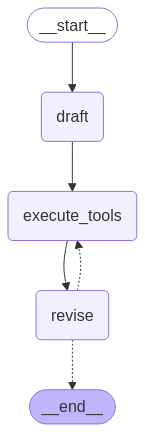

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
events = graph.stream(
    {"messages": [HumanMessage(content="AI Agent가 무엇인가요?")]},
    stream_mode="values",
)
for i, step in enumerate(events):
    print(f"Step {i}")
    step["messages"][-1].pretty_print()

Step 0
================================ Human Message =================================

AI Agent가 무엇인가요?
Step 1
================================== Ai Message ==================================
Tool Calls:
  AnswerQuestion (call_VMcAHxeYf6pQic9wv0wjj7fx)
 Call ID: call_VMcAHxeYf6pQic9wv0wjj7fx
  Args:
    answer: AI Agent는 인공지능 기술을 통해 특정 작업이나 기능을 수행하도록 설계된 소프트웨어 프로그램입니다. 이 에이전트는 자연어 처리를 통해 사용자의 요청을 이해하고, 머신러닝 알고리즘을 활용해 복잡한 문제를 해결하며, 데이터를 분석하여 의사 결정을 지원할 수 있습니다. AI 에이전트는 다양한 분야에서 활용되고 있으며, 인공지능 비서, 챗봇, 자동화된 고객 지원 시스템, 자율 주행 차량과 같은 다양한 형태로 제공될 수 있습니다. 이들은 특정 목적을 위해 인간의 의도를 이해하고 이에 따라 반응하는 능력을 가지고 있습니다. 이러한 에이전트는 종종 지속적으로 학습하고 환경의 변화에 적응할 수 있는 특징을 가지며, 사용자의 경험을 개선하기 위해 데이터에서 인사이트를 추출합니다. 하지만 이 기술의 구현에는 윤리적 고려 사항과 데이터 보안 문제도 따르게 됩니다.
    search_queries: ['AI Agent란 무엇인가', 'AI 에이전트의 기능과 응용', 'AI 에이전트와 머신러닝의 관계']
    reflection: {'missing': 'AI 에이전트의 구체적인 예시나 실제 적용 사례가 부족합니다. 또한 AI 에이전트가 작동하는 구체적인 메커니즘이나 기술적 요소에 대한 설명도 추가할 수 있습니다.', 'superfluous': '기본적인 설명을 넘어, AI 에이전트의 응용 분야에 관한 부분은 질문의 포괄적